# Data load

In [1]:
# Referencias:

# Dataset: https://www.kaggle.com/datasets/mirzahasnine/loan-data-set

In [28]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import LabelEncoder
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix
from sklearn.model_selection import train_test_split
from sklearn import metrics
from sklearn.impute import SimpleImputer

In [55]:
df_train = pd.read_csv('/content/loan_train.csv')
df_valid = pd.read_csv('/content/loan_test.csv')

In [4]:
df_train.head(2)

,Gender,Married,Dependents,Education,Self_Employed,Applicant_Income,Coapplicant_Income,Loan_Amount,Term,Credit_History,Area,Status
0,Male,No,0,Graduate,No,584900,0.0,15000000,360.0,1.0,Urban,Y
1,Male,Yes,1,Graduate,No,458300,150800.0,12800000,360.0,1.0,Rural,N


In [5]:
df_valid.head(2)

,Gender,Married,Dependents,Education,Self_Employed,Applicant_Income,Coapplicant_Income,Loan_Amount,Term,Credit_History,Area
0,Male,Yes,0,Graduate,No,572000,0,11000000,360.0,1.0,Urban
1,Male,Yes,1,Graduate,No,307600,150000,12600000,360.0,1.0,Urban


# Data analysis

## Data Meaning

| Nome da Coluna       | Descrição em Inglês                                                                                       | Descrição em Português                                                                                      |
|----------------------|-----------------------------------------------------------------------------------------------------------|-------------------------------------------------------------------------------------------------------------|
| Gender               | Gender of the loan applicant.                                                                            | Gênero do solicitante do <br>empréstimo.                                                                    |
| Married              | Marital status of the loan applicant.                                                                    | Estado civil do solicitante <br>do empréstimo.                                                              |
| Dependents           | Number of dependents of the loan applicant.                                                              | Número de dependentes do <br>solicitante do empréstimo.                                                     |
| Education            | Educational level of the loan applicant.                                                                  | Nível educacional do <br>solicitante do empréstimo.                                                         |
| Self_Employed        | Indicates whether the loan applicant is self-employed.                                                    | Indica se o solicitante do <br>empréstimo é autônomo.                                                      |
| Applicant_Income     | Income of the loan applicant.                                                                            | Renda do solicitante do <br>empréstimo.                                                                     |
| Coapplicant_Income   | Income of the co-applicant, if applicable.                                                               | Renda do co-solicitante, se aplicável.                                                                      |
| Loan_Amount          | Amount of the loan applied for or received.                                                               | Valor do empréstimo <br>solicitado ou recebido.                                                             |
| Term                 | Duration of the loan, indicating the<br> time period over which the loan is to be repaid.                     | Duração do empréstimo, <br>indicando o período de tempo durante o qual o empréstimo deve ser pago.          |
| Credit_History       | Credit history of the loan applicant, <br>with values like '1' for good credit history and '0' for poor credit history. | Histórico de crédito do solicitante do <br>empréstimo, com valores como '1' para bom histórico de crédito e '0' <br>para histórico de crédito ruim. |
| Area                 | Area or location associated with the <br>loan applicant, such as 'Urban', 'Rural', or 'Semiurban'.           | Área ou localização associada ao solicitante do <br>empréstimo, como 'Urbana', 'Rural' ou 'Semiurbana'.  |
| Status               | Status of the loan application <br>or loan approval, indicating whether the loan<br> was approved or denied, or its current status. | Status da aplicação do empréstimo <br>ou aprovação do empréstimo, indicando se o empréstimo<br> foi aprovado ou negado, ou seu status atual. |


## Data Values

In [6]:
df_train.shape

(614, 12)

In [7]:
df_train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 614 entries, 0 to 613
Data columns (total 12 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   Gender              601 non-null    object 
 1   Married             611 non-null    object 
 2   Dependents          599 non-null    object 
 3   Education           614 non-null    object 
 4   Self_Employed       582 non-null    object 
 5   Applicant_Income    614 non-null    int64  
 6   Coapplicant_Income  614 non-null    float64
 7   Loan_Amount         614 non-null    int64  
 8   Term                600 non-null    float64
 9   Credit_History      564 non-null    float64
 10  Area                614 non-null    object 
 11  Status              614 non-null    object 
dtypes: float64(3), int64(2), object(7)
memory usage: 57.7+ KB


In [8]:
df_train.columns

Index(['Gender', 'Married', 'Dependents', 'Education', 'Self_Employed',
       'Applicant_Income', 'Coapplicant_Income', 'Loan_Amount', 'Term',
       'Credit_History', 'Area', 'Status'],
      dtype='object')

In [19]:
df_train.describe()

,Applicant_Income,Coapplicant_Income,Loan_Amount,Term,Credit_History
count,6.140000e+02,6.140000e+02,6.140000e+02,600.00000,564.000000
mean,5.403459e+05,1.621246e+05,1.414104e+07,342.00000,0.842199
std,6.109042e+05,2.926248e+05,8.815682e+06,65.12041,0.364878
min,1.500000e+04,0.000000e+00,0.000000e+00,12.00000,0.000000
25%,2.877500e+05,0.000000e+00,9.800000e+06,360.00000,1.000000
50%,3.812500e+05,1.188500e+05,1.250000e+07,360.00000,1.000000
75%,5.795000e+05,2.297250e+05,1.647500e+07,360.00000,1.000000
max,8.100000e+06,4.166700e+06,7.000000e+07,480.00000,1.000000


In [9]:
df_train['Gender'].value_counts(normalize=True)*100

Gender
Male      81.364393
Female    18.635607
Name: proportion, dtype: float64

In [10]:
df_train['Married'].value_counts(normalize=True)*100

Married
Yes    65.139116
No     34.860884
Name: proportion, dtype: float64

In [11]:
df_train['Status'].value_counts(normalize=True)*100

Status
Y    68.729642
N    31.270358
Name: proportion, dtype: float64

In [12]:
df_train['Self_Employed'].value_counts(normalize=True)*100

Self_Employed
No     85.910653
Yes    14.089347
Name: proportion, dtype: float64

In [13]:
df_train['Area'].value_counts(normalize=True)*100

Area
Semiurban    37.947883
Urban        32.899023
Rural        29.153094
Name: proportion, dtype: float64

In [14]:
df_train['Education'].value_counts(normalize=True)*100

Education
Graduate        78.175896
Not Graduate    21.824104
Name: proportion, dtype: float64

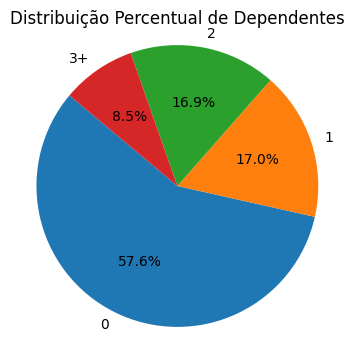

In [64]:
# Contagem de valores na coluna 'Dependents' em percentagem
dependents_percent = df_train['Dependents'].value_counts(normalize=True) * 100

# Plotar o gráfico de pizza
plt.figure(figsize=(4, 4))
plt.pie(dependents_percent, labels=dependents_percent.index, autopct='%1.1f%%', startangle=140)
plt.title('Distribuição Percentual de Dependentes')
plt.axis('equal')
plt.show()

In [16]:
df_train[df_train['Gender'].isnull()].head(3)

,Gender,Married,Dependents,Education,Self_Employed,Applicant_Income,Coapplicant_Income,Loan_Amount,Term,Credit_History,Area,Status
23,NaN,Yes,2,Not Graduate,No,336500,191700.0,11200000,360.0,0.0,Rural,N
126,NaN,Yes,3+,Graduate,No,2380300,0.0,37000000,360.0,1.0,Rural,Y
171,NaN,Yes,3+,Graduate,No,5176300,0.0,70000000,300.0,1.0,Urban,Y


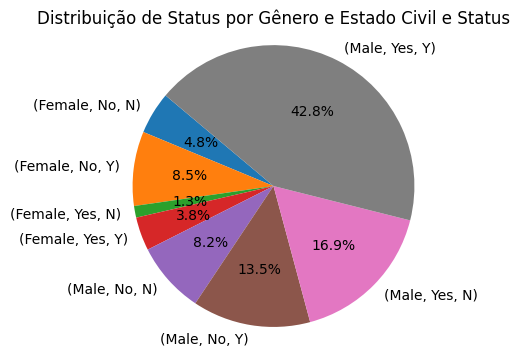

In [67]:
# Agrupar os dados e contar as observações
grouped_data = df_train.groupby(['Gender', 'Married', 'Status']).size()

# Plotar o gráfico de pizza
plt.figure(figsize=(4, 4))
grouped_data.plot(kind='pie', autopct='%1.1f%%', startangle=140)
plt.title('Distribuição de Status por Gênero e Estado Civil e Status')
plt.ylabel('')
plt.axis('equal')
plt.show()

In [20]:
df_train = df_train.drop_duplicates()
df_train = df_train.dropna()

# Data manipulation

In [21]:
# Substituindo os valores por valores binários
df_train['Gender'] = df_train['Gender'].replace({'Male': 1, 'Female': 0})
df_train['Married'] = df_train['Married'].replace({'Yes': 1, 'No': 0})
df_train['Education'] = df_train['Education'].replace({'Graduate': 1, 'Not Graduate': 0})
df_train['Area'] = df_train['Area'].replace({'Semiurban': 0, 'Urban': 1, 'Rural': 2})
df_train['Self_Employed'] = df_train['Self_Employed'].replace({'Yes': 1, 'No': 0})
df_train['Status'] = df_train['Status'].replace({'Y': 1, 'N': 0})
df_train['Dependents'] = df_train['Dependents'].replace({'0':0,'1':1,'2':2,'3+': 3})


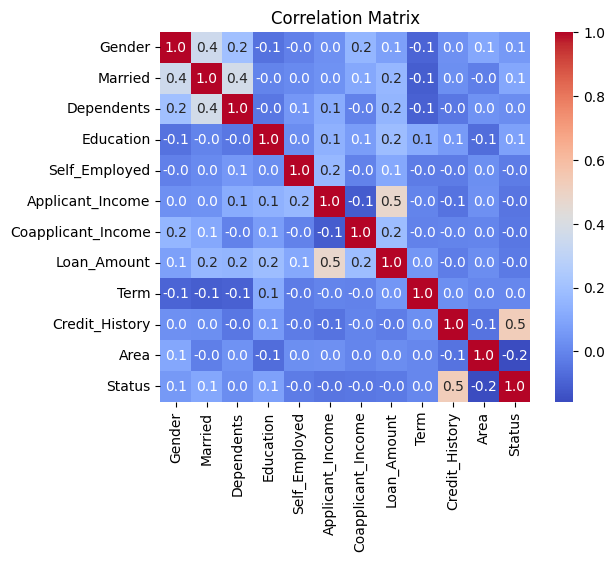

In [22]:
correlation_matrix = df_train.corr(numeric_only=True)

# Plot heatmap
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', fmt='.1f', square=True)
plt.title('Correlation Matrix')
plt.show()

In [23]:
# Encontrar as 5 maiores correlações diferentes de 1
top_correlations = correlation_matrix.unstack().sort_values(ascending=False)
top_correlations = top_correlations[(top_correlations < 1) & (top_correlations > -1)].drop_duplicates().head(5)

print("As 5 maiores correlações diferentes de 1 são:")
for index, correlation in top_correlations.items():
    col1, col2 = index
    print(f"{col1} - {col2}: {correlation}")

As 5 maiores correlações diferentes de 1 são:
Status - Credit_History: 0.5281575083768056
Applicant_Income - Loan_Amount: 0.47239384668314915
Married - Dependents: 0.3761972371821869
Married - Gender: 0.3541354089473721
Dependents - Gender: 0.19887994067755882


In [24]:
df_train.head(3)

,Gender,Married,Dependents,Education,Self_Employed,Applicant_Income,Coapplicant_Income,Loan_Amount,Term,Credit_History,Area,Status
0,1,0,0,1,0,584900,0.0,15000000,360.0,1.0,1,1
1,1,1,1,1,0,458300,150800.0,12800000,360.0,1.0,2,0
2,1,1,0,1,1,300000,0.0,6600000,360.0,1.0,1,1


In [25]:
# spliting data
X = df_train.drop(columns='Status')
y = df_train['Status']

# Dividir os dados em conjuntos de treino e teste
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [26]:
# Verificar as dimensões dos conjuntos de treino e teste
print("Dimensões do conjunto de treino:")
print(X_train.shape, y_train.shape)
print("Dimensões do conjunto de teste:")
print(X_test.shape, y_test.shape)

Dimensões do conjunto de treino:
(399, 11) (399,)
Dimensões do conjunto de teste:
(100, 11) (100,)


In [30]:
from sklearn.model_selection import GridSearchCV

# Definir a grade de hiperparâmetros
param_grid = {
    'n_estimators': [100, 200, 300],
    'max_features': ['sqrt', 'log2'],
    'max_depth': [None, 10, 20, 30],
    'min_samples_split': [2, 5, 10],
    'min_samples_leaf': [1, 2, 4],
    'bootstrap': [True, False]
}

# Inicializar o RandomForestClassifier
rf = RandomForestClassifier(random_state=42)

# Configurar o GridSearchCV
grid_search = GridSearchCV(estimator=rf, param_grid=param_grid, cv=5, n_jobs=-1, verbose=2, scoring='accuracy')

# Ajustar o modelo aos dados de treino
grid_search.fit(X_train, y_train)

# Melhor combinação de hiperparâmetros
print("Best parameters found: ", grid_search.best_params_)
best_rf = grid_search.best_estimator_


Fitting 5 folds for each of 648 candidates, totalling 3240 fits
Best parameters found:  {'bootstrap': True, 'max_depth': None, 'max_features': 'auto', 'min_samples_leaf': 1, 'min_samples_split': 10, 'n_estimators': 100}


/usr/local/lib/python3.10/dist-packages/sklearn/ensemble/_forest.py:424: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'` or remove this parameter as it is also the default value for RandomForestClassifiers and ExtraTreesClassifiers.
  warn(


In [42]:
# Inicializar o modelo RandomForestClassifier
rf_classifier = RandomForestClassifier(
    bootstrap=True,
    max_depth=10,
    max_features='sqrt',
    min_samples_leaf=1,
    min_samples_split=10,
    n_estimators=200,
    random_state=42
)

# Treinar o modelo
rf_classifier.fit(X_train, y_train)

# Fazer previsões com os dados de teste
y_pred = rf_classifier.predict(X_test)

# Avaliar o desempenho do modelo
accuracy = accuracy_score(y_test, y_pred)
print(f"Accuracy: {accuracy:.2f}")

print("Classification Report:")
print(classification_report(y_test, y_pred))

print("Confusion Matrix:")
print(confusion_matrix(y_test, y_pred))

Accuracy: 0.84
Classification Report:
              precision    recall  f1-score   support

           0       0.92      0.61      0.73        36
           1       0.82      0.97      0.89        64

    accuracy                           0.84       100
   macro avg       0.87      0.79      0.81       100
weighted avg       0.85      0.84      0.83       100

Confusion Matrix:
[[22 14]
 [ 2 62]]


## Using the model on Data test.

In [56]:
# Substituindo os valores por valores binários
df_valid['Gender'] = df_valid['Gender'].replace({'Male': 1, 'Female': 0})
df_valid['Married'] = df_valid['Married'].replace({'Yes': 1, 'No': 0})
df_valid['Education'] = df_valid['Education'].replace({'Graduate': 1, 'Not Graduate': 0})
df_valid['Area'] = df_valid['Area'].replace({'Semiurban': 0, 'Urban': 1, 'Rural': 2})
df_valid['Self_Employed'] = df_valid['Self_Employed'].replace({'Yes': 1, 'No': 0})
df_valid['Dependents'] = df_valid['Dependents'].replace({'0':0,'1':1,'2':2,'3+': 3})

In [57]:
# Identificar colunas numéricas e categóricas
numerical_columns = df_valid.select_dtypes(include=['int64', 'float64']).columns
categorical_columns = df_valid.select_dtypes(include=['object', 'category']).columns

# Imputação para todas as colunas
imputer = SimpleImputer(strategy='most_frequent')  # Para colunas categóricas, você pode usar 'most_frequent' ou 'constant'
df_valid[:] = imputer.fit_transform(df_valid)

# Certifique-se de que todas as colunas numéricas foram imputadas corretamente
imputer = SimpleImputer(strategy='mean')  # Para colunas numéricas, você pode usar 'mean', 'median', ou 'constant'
df_valid[numerical_columns] = imputer.fit_transform(df_valid[numerical_columns])

In [58]:
df_valid.isnull().sum()

Gender                0
Married               0
Dependents            0
Education             0
Self_Employed         0
Applicant_Income      0
Coapplicant_Income    0
Loan_Amount           0
Term                  0
Credit_History        0
Area                  0
dtype: int64

In [59]:
# Fazer previsões no dataframe validação
novodf_predictions = rf_classifier.predict(df_valid)

# Se você precisar das probabilidades de previsão
novodf_probabilities = best_rf.predict_proba(df_valid)

df_valid2 = df_valid.copy()

# Adicionar previsões ao DataFrame original, se desejar
df_valid2['Status'] = novodf_predictions
df_valid2['probability_class_1'] = novodf_probabilities[:, 1]

In [62]:
df_valid2.head(3)

,Gender,Married,Dependents,Education,Self_Employed,Applicant_Income,Coapplicant_Income,Loan_Amount,Term,Credit_History,Area,Status,probability_class_1
0,1.0,1.0,0.0,1.0,0.0,572000.0,0.0,11000000.0,360.0,1.0,1.0,1,0.803165
1,1.0,1.0,1.0,1.0,0.0,307600.0,150000.0,12600000.0,360.0,1.0,1.0,1,0.921957
2,1.0,1.0,2.0,1.0,0.0,500000.0,180000.0,20800000.0,360.0,1.0,1.0,1,0.852665
